In [0]:
import numpy as np
import pandas as pd
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("speaker.csv")

In [4]:
train.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [5]:
train["sentiment"].describe()

count     30000
unique       13
top       worry
freq       7433
Name: sentiment, dtype: object

In [6]:
test.head()

,person01,person02
0,hello mission is you're looking for the truck ...,I would like information on purchasing a New V...
1,on the road or is it near your garage no no I ...,hello okay honey hey Mike Nicholas I love Reno...
2,talking to Mr Wenzel trying to assess your req...,this is winsome hi this is feedback listen to ...
3,I want to put in today will be at 6 using for ...,yes you Lisa demo discussion are you looking s...
4,hello hello listen to title this call Santa I'...,my name is Trish B our 16 s 531 okay I let me ...


In [0]:
#happy, sad, disgust, fear, surprise, angry, neutral
#hate = angry, worry = fear, happiness = fun, happy, empty = neutral
emotion_dict = {"hate": "angry", "worry": "fear", "empty": "neutral", "happiness": "happy",
                "love": "happy","fun": "happy", "sadness": "sad", "neutral": "neutral",
                "enthusiasm": "happy", "surprise": "surprise"}

In [0]:
def replace_emotion(x):
    for emotion in emotion_dict:
        if x == emotion:
            x = emotion_dict[emotion]
            return x 

In [0]:
train["sentiment"] = train["sentiment"].apply(lambda x: replace_emotion(x))

In [10]:
train.head()

,sentiment,content
0,neutral,@tiffanylue i know i was listenin to bad habi...
1,sad,Layin n bed with a headache ughhhh...waitin o...
2,sad,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [0]:
train.dropna(inplace=True)

In [12]:
train.describe()

,sentiment,content
count,28724,28724
unique,6,28666
top,fear,Good Morning
freq,7433,5


In [13]:
train.groupby("sentiment").describe()

content  ...     
            count  ... freq
sentiment          ...     
angry        1187  ...    1
fear         7433  ...    3
happy        6664  ...    3
neutral      6999  ...    3
sad          4828  ...    2
surprise     1613  ...    1

[6 rows x 4 columns]

In [14]:
train["length"] = train["content"].apply(len)
train.head()

,sentiment,content,length
0,neutral,@tiffanylue i know i was listenin to bad habi...,92
1,sad,Layin n bed with a headache ughhhh...waitin o...,60
2,sad,Funeral ceremony...gloomy friday...,35
3,happy,wants to hang out with friends SOON!,36
4,neutral,@dannycastillo We want to trade with someone w...,86


In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train["sentiment"] = label_encoder.fit_transform(train["sentiment"])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

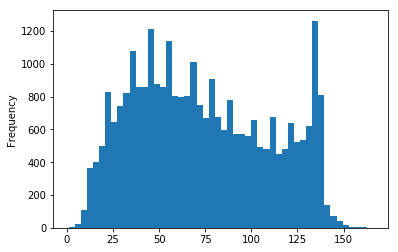

In [17]:
train['length'].plot(bins=50, kind='hist') 

In [0]:
import string
from nltk.corpus import stopwords

In [0]:
def text_process(text):
    no_punctuation = [char for char in text if char not in string.punctuation]

    no_punctuation = "".join(no_punctuation)

    return " ".join([word for word in no_punctuation.split() if word.lower() not in stopwords.words("english")])

In [20]:
text_process("Layin n bed with a headache ughhhh...waitin o")

'Layin n bed headache ughhhhwaitin'

In [0]:
test["person01"] = test["person01"].apply(lambda x: text_process(x))
test["person02"] = test["person02"].apply(lambda x: text_process(x))

In [22]:
test

,person01,person02
0,hello mission youre looking truck East PlaySta...,would like information purchasing New Vegas fa...
1,road near garage going need Bombay got broken ...,hello okay honey hey Mike Nicholas love Reno I...
2,talking Mr Wenzel trying assess requested goin...,winsome hi feedback listen Big Data System cop...
3,want put today 6 using Commercial Services how...,yes Lisa demo discussion looking specifically ...
4,hello hello listen title call Santa Im sorry c...,name Trish B 16 531 okay let check assistance ...


In [0]:
train["content"] = train["content"].apply(lambda x: text_process(x))

In [24]:
train.head()

,sentiment,content,length
0,3,tiffanylue know listenin bad habit earlier sta...,92
1,4,Layin n bed headache ughhhhwaitin call,60
2,4,Funeral ceremonygloomy friday,35
3,2,wants hang friends SOON,36
4,3,dannycastillo want trade someone Houston ticke...,86


In [0]:

from sklearn.feature_extraction.text import CountVectorizer
 #Might take awhile...
bow_transformer = CountVectorizer()
content_bow_train = bow_transformer.fit_transform(train['content'])

content_bow_speaker1 = bow_transformer.transform(test["person01"])
content_bow_speaker2 = bow_transformer.transform(test["person02"])


In [26]:
print(content_bow_train.shape)
print(content_bow_speaker1.shape)
print(content_bow_speaker2.shape)

(28724, 41553)
(5, 41553)
(5, 41553)


In [0]:
#print(bow_transformer_train.get_feature_names())
#len(bow_transformer_train.get_feature_names())

In [28]:

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
content_tfidf_train = tfidf_transformer.fit_transform(content_bow_train)
print(content_tfidf_train.shape)


(28724, 41553)


In [0]:
content_tfidf_speaker1 = tfidf_transformer.transform(content_bow_speaker1)

content_tfidf_speaker2 = tfidf_transformer.transform(content_bow_speaker2)

In [30]:
content_bow_train.shape

(28724, 41553)

In [31]:
content_tfidf_train.shape

(28724, 41553)

In [32]:
content_bow_speaker1.shape

(5, 41553)

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(content_tfidf_train, train["sentiment"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
person01_predictions = label_encoder.inverse_transform(nb.predict(content_tfidf_speaker1))
person02_predictions = label_encoder.inverse_transform(nb.predict(content_tfidf_speaker2))

In [38]:
person01_predictions

array(['neutral', 'fear', 'neutral', 'fear', 'fear'], dtype=object)

In [0]:
d = {"0":["file1.wav", "file2.wav","file3.wav","file4.wav","file5.wav"],
     "1":["perosn01","perosn01","perosn01","perosn01","perosn01"],
     "2":person01_predictions,
     "3":["perosn02","perosn02","perosn02","perosn02","perosn02"],
     "4":person02_predictions}
df = pd.DataFrame(d)
df.to_csv("BornAI.csv")     